## **Tugas Programan 2 - Rekomendasi Bengkel**

Kelompok:
1. Muhammad Rafli Ramadhan - 1301200204
2. Rizky nur Cahyana - 1301208561



In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## **Inisiasi Anggota Fuzzy dan Aturan Fuzzy**

In [22]:
fuzzyAnggota =  {
  'servis': [],
  'harga': []
}

Fuzzy Menggunakan membership function

Service
- buruk: 1 - 40
- cukup: 41 - 70
- baik: 71 - 100

Harga
- murah: 1 - 4
- cukup: 5 - 7
- mahal: 8 - 10

In [23]:
fuzzyAnggota['servis'].append({'buruk': [1, 40]})
fuzzyAnggota['servis'].append({'cukup': [41, 70]})
fuzzyAnggota['servis'].append({'baik': [71, 100]})

fuzzyAnggota['harga'].append({'murah': [1, 4]})
fuzzyAnggota['harga'].append({'cukup': [5, 7]})
fuzzyAnggota['harga'].append({'mahal': [8, 10]})

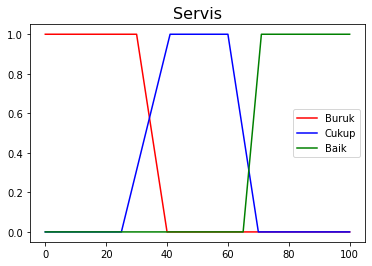

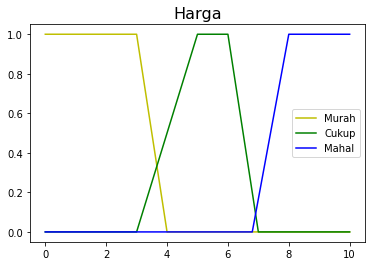

In [6]:
plt.title("Servis", fontsize=16)

plt.plot([0, 30,40, 41, 100], [1, 1,0, 0, 0], "r")
plt.plot([0, 25 ,41,60, 70,80,100], [0, 0, 1, 1,0,0,0], color="b")
plt.plot([0, 65, 71, 100], [0, 0, 1, 1], color="g")

plt.plot(0, 0, 'r', linewidth=1.5, label='Buruk')
plt.plot(0, 0, 'b', linewidth=1.5, label='Cukup')
plt.plot(0, 0, 'g', linewidth=1.5, label='Baik')

plt.legend()
plt.show()

plt.title("Harga", fontsize=16)

plt.plot([0, 3, 4, 8, 10], [1, 1, 0, 0 ,0], "y")
plt.plot([0, 3 ,5, 6, 7, 10], [0, 0, 1, 1, 0, 0], "g")
plt.plot([0,6.8, 8, 10], [0,0, 1, 1], "b")

plt.plot(0, 0, 'y', linewidth=1.5, label='Murah')
plt.plot(0, 0, 'g', linewidth=1.5, label='Cukup')
plt.plot(0, 0, 'b', linewidth=1.5, label='Mahal')

plt.legend()
plt.show()

In [7]:
fuzzyRule = {
  ('buruk', 'mahal'): 'tidak rekomen',
  ('buruk', 'cukup'): 'tidak rekomen',
  ('buruk', 'murah'): 'rekomen',
  ('cukup', 'mahal'): 'tidak rekomen',
  ('cukup', 'cukup'): 'cukup rekomen',
  ('cukup', 'murah'): 'rekomen',
  ('baik', 'mahal'): 'rekomen',
  ('baik', 'cukup'): 'sangat rekomen',
  ('baik', 'murah'): 'sangat rekomen',
}

In [8]:
deffuzy = {'tidak rekomen': 0, "cukup rekomen": 50, "rekomen": 75, "sangat rekomen": 100}

## **Ambil Data Dari Excel**

In [24]:
def ReadFromExcel():
  return pd.read_excel('https://github.com/raflidev/TuPro-Fuzzy/blob/main/bengkel.xlsx?raw=true')

## **Inisialisasi Fuzzy dan Fuzzification**

In [25]:
def BuatFuzzy():
  data = fuzzyAnggota
  keanggotaan = {}
  for i in data:
      keanggotaan[i] = {}
      for j in data[i]:
          k = list(j.keys())[0]
          keanggotaan[i][k] = 0
  return keanggotaan

In [26]:
print("Hasil Membuat Fuzzy Kosong")
print(BuatFuzzy())

Hasil Membuat Fuzzy Kosong
{'servis': {'buruk': 0, 'cukup': 0, 'baik': 0}, 'harga': {'murah': 0, 'cukup': 0, 'mahal': 0}}


fuzzification menggunakan membership function

In [12]:
def Fuzzification(fuzzy, x):
  anggota = BuatFuzzy()
  for j, data in enumerate(anggota[fuzzy].keys()):
      b, c = fuzzyAnggota[fuzzy][j][data]
      a, d = b - 1, c + 1
      if b <= x <= c:
          anggota[fuzzy][data] = 1
      elif a < x < b:
          anggota[fuzzy][data] = (x-a)/(b-a)
      elif c < x <= d:
          anggota[fuzzy][data] = (d-x)/(d-c)
  return anggota[fuzzy]

In [13]:
def FuzzificationData(excel):
  fuzzied = []
  for i in range(len(excel)):
      fuzzed = {}
      for j in fuzzyAnggota:
          fuzzed[j] = Fuzzification(j, excel[j][i])
      fuzzied.append(fuzzed)
  return fuzzied

In [27]:
data = ReadFromExcel()
fuzzied = FuzzificationData(data)
print("Hasil dari Fuzzification\n")
for i in range(10):
  print("Service: ",fuzzied[i]['servis'])
  print("Harga: ",fuzzied[i]['harga'])
  print('')

Hasil dari Fuzzification

Service:  {'buruk': 0, 'cukup': 1, 'baik': 0}
Harga:  {'murah': 0, 'cukup': 1, 'mahal': 0}

Service:  {'buruk': 0, 'cukup': 1, 'baik': 0}
Harga:  {'murah': 1, 'cukup': 0, 'mahal': 0}

Service:  {'buruk': 0, 'cukup': 0, 'baik': 1}
Harga:  {'murah': 1, 'cukup': 0, 'mahal': 0}

Service:  {'buruk': 0, 'cukup': 1, 'baik': 0}
Harga:  {'murah': 1, 'cukup': 0, 'mahal': 0}

Service:  {'buruk': 1, 'cukup': 0, 'baik': 0}
Harga:  {'murah': 1, 'cukup': 0, 'mahal': 0}

Service:  {'buruk': 0, 'cukup': 1, 'baik': 0}
Harga:  {'murah': 0, 'cukup': 0, 'mahal': 1}

Service:  {'buruk': 0, 'cukup': 1, 'baik': 0}
Harga:  {'murah': 0, 'cukup': 0.0, 'mahal': 1}

Service:  {'buruk': 1, 'cukup': 0, 'baik': 0}
Harga:  {'murah': 0, 'cukup': 0, 'mahal': 1}

Service:  {'buruk': 0, 'cukup': 1, 'baik': 0}
Harga:  {'murah': 1, 'cukup': 0, 'mahal': 0}

Service:  {'buruk': 1, 'cukup': 0, 'baik': 0}
Harga:  {'murah': 0, 'cukup': 0, 'mahal': 1}



## **Inference**

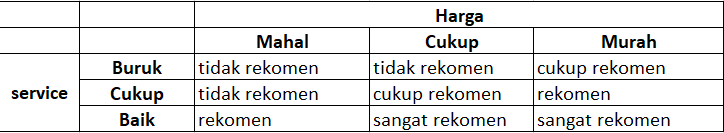

In [15]:
def Inference(fuzzied):
  inferenced = []
  for fuzzed in fuzzied:
      result = {}
      keys = []
      for i in fuzzyRule:
          keys.append(i)
          result[fuzzyRule[i]] = 0
      for key in keys:
          output = fuzzyRule[key]
          minVal = fuzzed[list(fuzzed.keys())[0]][key[0]]
          for j, val in enumerate(fuzzed):
              minVal = min(minVal, fuzzed[val][key[j]])
          result[output] = max(minVal, result[output])
      inferenced.append(result)
  return inferenced

In [28]:
inferenced = Inference(fuzzied)
for i in range(10):
  print(inferenced[i])
  print('')

{'tidak rekomen': 0, 'rekomen': 0, 'cukup rekomen': 1, 'sangat rekomen': 0}

{'tidak rekomen': 0, 'rekomen': 1, 'cukup rekomen': 0, 'sangat rekomen': 0}

{'tidak rekomen': 0, 'rekomen': 0, 'cukup rekomen': 0, 'sangat rekomen': 1}

{'tidak rekomen': 0, 'rekomen': 1, 'cukup rekomen': 0, 'sangat rekomen': 0}

{'tidak rekomen': 0, 'rekomen': 1, 'cukup rekomen': 0, 'sangat rekomen': 0}

{'tidak rekomen': 1, 'rekomen': 0, 'cukup rekomen': 0, 'sangat rekomen': 0}

{'tidak rekomen': 1, 'rekomen': 0, 'cukup rekomen': 0.0, 'sangat rekomen': 0}

{'tidak rekomen': 1, 'rekomen': 0, 'cukup rekomen': 0, 'sangat rekomen': 0}

{'tidak rekomen': 0, 'rekomen': 1, 'cukup rekomen': 0, 'sangat rekomen': 0}

{'tidak rekomen': 1, 'rekomen': 0, 'cukup rekomen': 0, 'sangat rekomen': 0}



Defuzzification menggunakan metode sugeno 

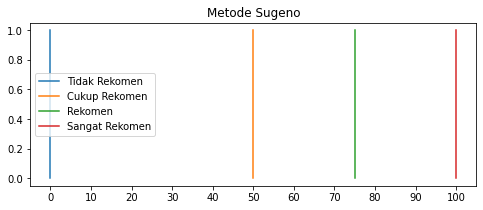

In [29]:
deffuzy = {'tidak rekomen': 0, "cukup rekomen": 50, "rekomen": 75, "sangat rekomen": 100}
plt.figure(figsize=(8, 3))
plt.title("Metode Sugeno")

plt.plot([0, 0], [0, 1], label="Tidak Rekomen")
plt.plot([50, 50], [0, 1], label="Cukup Rekomen")
plt.plot([75, 75], [0, 1], label="Rekomen")
plt.plot([100, 100], [0, 1], label="Sangat Rekomen")
plt.xticks(np.arange(0, 110, 10.0))
plt.legend()
plt.show()

In [18]:
def Defuzzification(inferenced):
  results = []
  for inference in inferenced:
      numerator, denominator = 0, 0
      for output in deffuzy.keys():
          numerator += inference[output] * deffuzy[output]
          denominator += inference[output]
      results.append(numerator/denominator)
  
  data = ReadFromExcel()
  data['result'] = results
  return data

In [30]:
defuzz = Defuzzification(inferenced)
print(defuzz)

     id  servis  harga  result
0     1      58      7    50.0
1     2      54      1    75.0
2     3      98      2   100.0
3     4      52      4    75.0
4     5      11      4    75.0
..  ...     ...    ...     ...
95   96      30      1    75.0
96   97      25      3    75.0
97   98      27     10     0.0
98   99       8      6     0.0
99  100      11      8     0.0

[100 rows x 4 columns]


## **Persortingan untuk mendapatkan peringkat**

In [20]:
print(defuzz.sort_values(by='result', ascending=False)[:10])

    id  servis  harga  result
51  52      94      3   100.0
59  60      79      6   100.0
2    3      98      2   100.0
33  34      93      4   100.0
90  91      98      3   100.0
91  92      83      3   100.0
15  16      82      6   100.0
62  63      78      7   100.0
14  15      78      5   100.0
12  13      80      3   100.0


## **Convert menjadi Excel**

In [ ]:
tmp = defuzz.sort_values(by='result', ascending=False)[:10]
tmp.to_excel("peringkat.xlsx", engine='openpyxl', index=False)